In [1]:
from langgraph.graph import StateGraph, START, END 
from langgraph.checkpoint.memory import InMemorySaver 
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from typing import TypedDict 

class FaultState(TypedDict):
    input: str 
    step1: str
    step2: str
    step3: str

In [3]:
import time
def step1(state: FaultState) -> FaultState:
    print("Step 1: Executed✅")
    return {'input': state['input'], 'step1': "done"}

def step2(state: FaultState) -> FaultState:
    print(f"Step 2: interupt execution❌")
    time.sleep(30)
    return {'step2': "done"}

def step3(state: FaultState) -> FaultState:
    print(f"Step 3: Executed✅")
    return {'step3': 'done'}

In [4]:
checkpointer = InMemorySaver() 

graph = StateGraph(FaultState) 

graph.add_node("step1", step1)
graph.add_node("step2", step2)
graph.add_node("step3", step3) 

graph.add_edge(START, "step1")
graph.add_edge("step1", "step2")
graph.add_edge("step2", "step3")
graph.add_edge("step3", END) 

workflow = graph.compile(checkpointer=checkpointer)

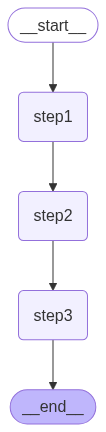

In [5]:
workflow

In [6]:
config1 = {'configurable': {'thread_id': 1}}

try:
    print(f"Running graph: Please manually interupt at step2")
    workflow.invoke({'input': "start"}, config = config1)
except KeyboardInterrupt:
    print(f"Execution got interupted❌")

Running graph: Please manually interupt at step2
Step 1: Executed✅
Step 2: interupt execution❌
Execution got interupted❌


In [7]:
print(workflow.get_state(config=config1))

StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step2',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f071ad2-a03b-68dc-8001-b97f78695cbb'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-08-05T03:34:59.665327+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f071ad2-a039-61c3-8000-2cf6799f0acd'}}, tasks=(PregelTask(id='f9fd7277-7beb-5c36-7c33-2be0f8ac7b22', name='step2', path=('__pregel_pull', 'step2'), error=None, interrupts=(), state=None, result=None),), interrupts=())


In [8]:
list(workflow.get_state_history(config=config1))

[StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step2',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f071ad2-a03b-68dc-8001-b97f78695cbb'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-08-05T03:34:59.665327+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f071ad2-a039-61c3-8000-2cf6799f0acd'}}, tasks=(PregelTask(id='f9fd7277-7beb-5c36-7c33-2be0f8ac7b22', name='step2', path=('__pregel_pull', 'step2'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'input': 'start'}, next=('step1',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f071ad2-a039-61c3-8000-2cf6799f0acd'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-08-05T03:34:59.664326+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f071ad2-a035-6dd

In [9]:
final_state = workflow.invoke(None, config=config1)
print(final_state)

Step 2: interupt execution❌
Step 3: Executed✅
{'input': 'start', 'step1': 'done', 'step2': 'done', 'step3': 'done'}


In [12]:
list(workflow.get_state_history(config=config1))

[StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done', 'step3': 'done'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f071ad6-1ad3-6818-8003-4656bca27c0f'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2025-08-05T03:36:33.050831+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f071ad6-1ad3-6817-8002-74b66f710ba5'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=('step3',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f071ad6-1ad3-6817-8002-74b66f710ba5'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-08-05T03:36:33.050831+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f071ad2-a03b-68dc-8001-b97f78695cbb'}}, tasks=(PregelTask(id='1d167f97-51b6-23af-31d2-c496b7aeeb4d', name='st

### **Time Travel**

In [13]:
workflow.get_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f071ad2-a039-61c3-8000-2cf6799f0acd"}})

StateSnapshot(values={'input': 'start'}, next=('step1',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f071ad2-a039-61c3-8000-2cf6799f0acd'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-08-05T03:34:59.664326+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f071ad2-a035-6dde-bfff-c61e80662ec8'}}, tasks=(PregelTask(id='4b70dddb-ab78-acdf-b25d-4675c7c07d2c', name='step1', path=('__pregel_pull', 'step1'), error=None, interrupts=(), state=None, result={'input': 'start', 'step1': 'done'}),), interrupts=())

In [15]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f071ad2-a039-61c3-8000-2cf6799f0acd"}})

Step 1: Executed✅
Step 2: interupt execution❌
Step 3: Executed✅


{'input': 'start', 'step1': 'done', 'step2': 'done', 'step3': 'done'}